<a href="https://colab.research.google.com/github/olodenm/info_2022_olo/blob/Netology_HW/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%C2%AB%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:


1.   построить не менее 4 визуализаций различных видов;
2.   каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
3. по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).






In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<details>
  
  <summary><h2>Описание данных</h2></summary>

Набор данных содержит 11 столбцов со следующими характеристиками:


>  

1.   work_year: Год выплаты зарплаты.

2.   experience_level: Уровень опыта работы на должности в течение года со следующими возможными значениями:

  * EN: Начальный уровень / Junior
  * MI: Средний уровень / Intermediate
  * SE: Старший уровень / Expert
  * EX: Топ-менеджеры / Director

3.  employment_type: Тип занятости для должности:

  * PT: Неполный рабочий день
  * FT: Полный рабочий день
  * CT: Контракт
  * FL: Фрилансер

4. job_title: Должность, на которой работали в течение года.

5. salary: Общая сумма выплаченной заработной платы.

6. salary_currency: Валюта выплачиваемой зарплаты имеет код валюты ISO 4217.

7. salary_in_usd: Зарплата в долларах США (курс обмена валют, разделенный на средний курс доллара США за соответствующий год, по данным fxdata.foorilla.com).

8. employee_residence: Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

9. remote_ratio: Общий объем работ, выполняемых удаленно, возможные значения следующие:

 * 0: Нет удаленной работы (менее 20%)
 * 50: Частично удаленный / гибридный
 * 100: Полностью удаленно (более 80%)

10. company_location: Страна головного офиса или филиала-подрядчика работодателя в виде кода страны ISO 3166.

11. company_size: Среднее количество человек, работавших в компании в течение года:

 * S: Менее 50 сотрудников (маленький)
 * M: 50 до 250 сотрудников (средний)
 * L: Более 250 сотрудников (большие)

 </details>

In [3]:
! gdown --id 1MHKtPx1Jd2oAjEmXxnlZPWFNcvEdFsUq

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MHKtPx1Jd2oAjEmXxnlZPWFNcvEdFsUq
To: /content/archive.zip
100% 53.2k/53.2k [00:00<00:00, 100MB/s]


In [4]:
df = pd.read_csv('/content/archive.zip')
df.sample(5) # 8113 rows × 11 columns

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
6077,2023,SE,FT,Data Scientist,198200,USD,198200,US,100,US,M
3328,2023,SE,FT,Data Engineer,108768,USD,108768,US,0,US,M
2135,2023,MI,FT,Data Engineer,127000,USD,127000,US,0,US,M
6784,2022,SE,FT,Data Scientist,247500,USD,247500,US,0,US,M
4373,2023,MI,FT,Data Analyst,85000,USD,85000,US,0,US,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8113 entries, 0 to 8112
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8113 non-null   int64 
 1   experience_level    8113 non-null   object
 2   employment_type     8113 non-null   object
 3   job_title           8113 non-null   object
 4   salary              8113 non-null   int64 
 5   salary_currency     8113 non-null   object
 6   salary_in_usd       8113 non-null   int64 
 7   employee_residence  8113 non-null   object
 8   remote_ratio        8113 non-null   int64 
 9   company_location    8113 non-null   object
 10  company_size        8113 non-null   object
dtypes: int64(4), object(7)
memory usage: 697.3+ KB


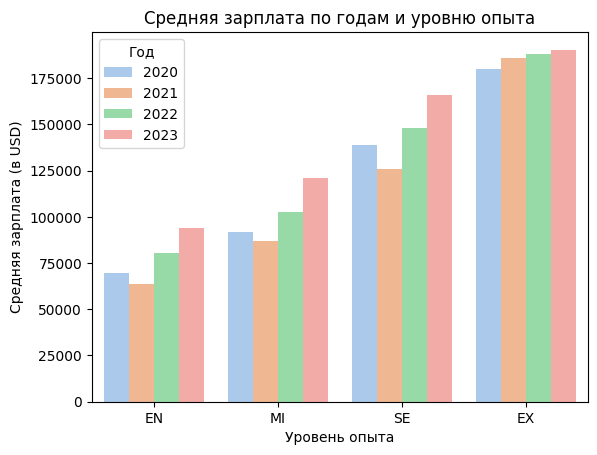

In [15]:
# Группировка данных по годам и уровню опыта, вычисление средней зарплаты
salary_by_year_experience = (
    df.groupby(['work_year', 'experience_level'])['salary_in_usd']
    .mean().reset_index())

# Вводим переменную для сортировки уровня опыта от меньшего к большему
experience_order = ['EN', 'MI', 'SE', 'EX']

# Построение столбчатой диаграммы
sns.barplot(data=salary_by_year_experience,
            x='experience_level',
            y='salary_in_usd',
            hue='work_year',
            palette='pastel',
            order=experience_order)
plt.title('Средняя зарплата по годам и уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Средняя зарплата (в USD)')
plt.legend(title='Год')


(array([0, 1, 2, 3]),
 [Text(0, 0, 'EN'), Text(1, 0, 'MI'), Text(2, 0, 'SE'), Text(3, 0, 'EX')])

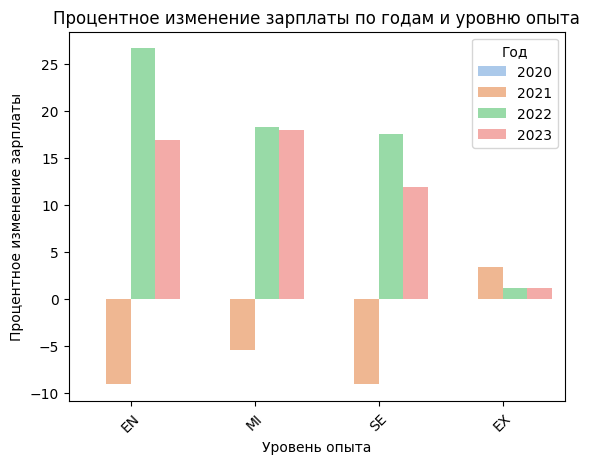

In [14]:
# Группировка данных по годам и уровню опыта, вычисление средней зарплаты
salary_by_year_experience = (
    df.groupby(['work_year', 'experience_level'])['salary_in_usd']
    .mean().reset_index())

# Определение порядка сортировки для уровня опыта
experience_order = ['EN', 'MI', 'SE', 'EX']

# Вычисление процентного изменения зарплаты
salary_by_year_experience['percent_change'] = (
    salary_by_year_experience.groupby('experience_level')['salary_in_usd']
    .pct_change() * 100)

# Построение столбчатой диаграммы с Seaborn
sns.barplot(data=salary_by_year_experience,
            x='experience_level',
            y='percent_change',
            hue='work_year',
            palette='pastel',
            order=experience_order)
plt.title('Процентное изменение зарплаты по годам и уровню опыта')
plt.xlabel('Уровень опыта')
plt.ylabel('Процентное изменение зарплаты')
plt.legend(title='Год')
plt.xticks(rotation=45)
# plt.savefig('percent.jpeg', format='jpeg')


## Столбчатая диаграмма
 Мы видим две столбчатые диаграмы, по оси X уровень работника, по оси Y средня заработная плата, проводим анализ данных в динамике 4х рабочих лет.

 - По первому графику видно, что есть тенденция к росту заработной платы по годам, кроме 1 исключения,  которое более подробно визуализирован на 2ом граффике.
 На мой взгляд,спад в заработной платы у работников всех уровней, кроме топ-менеджмента, заключаеться в проблемах послековидной экономики, когда был рост инфляции, и для того чтобы сократить издержки руководство компании снижала заработную плату для рабочих, но видно что нет снижения заработной платы на руководящих должностях, это и следуюет из-за того, что часть зарплаты данных работников зависит от бонусов, диведентов и тд. т.к это данные в основном рынка труда США.Можем посмотреть средню доходность индекса акций и увидить что он вырос в за год ~30%,следовательно хороший бонусы управлению компании.
 Резимируем: снижения зарплаты для основной массы рабочих, снижает общии траты компании, что увеличивает свободный денежный поток, который можно потратить,например, на выкуп своих бумаг, сокращая эммисию .Это увеличивает рыночную стоймость компании и выплаты менеджменту за хорошую работу.

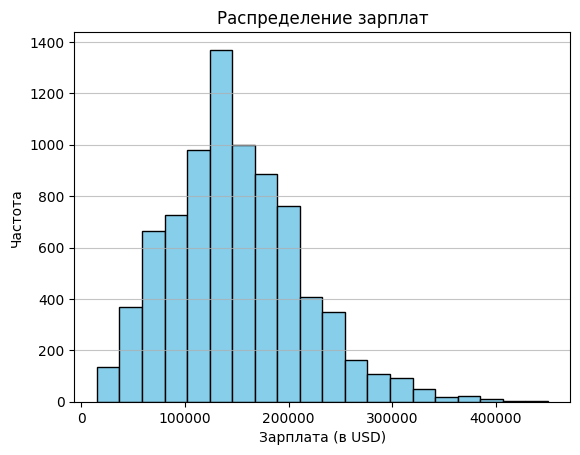

In [13]:
# Построение гистограммы
plt.hist(df['salary_in_usd'],
         bins=20,
         color='skyblue',
         edgecolor='black')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата (в USD)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Гистограмма
  по оси X зарплата в USD , по оси Y частота значений, смотрим на данные о заработной плате всех рабочих из df.
  - Нормальное распределение зарплат: гистограмма очень похожа на классическое нормальное распределение, можно предположить, что зарплаты в данной выборке подчиняются нормальному распределению,среднее значение (средняя зарплата) близко к медиане

Text(0, 0.5, 'Зарплата (в USD)')

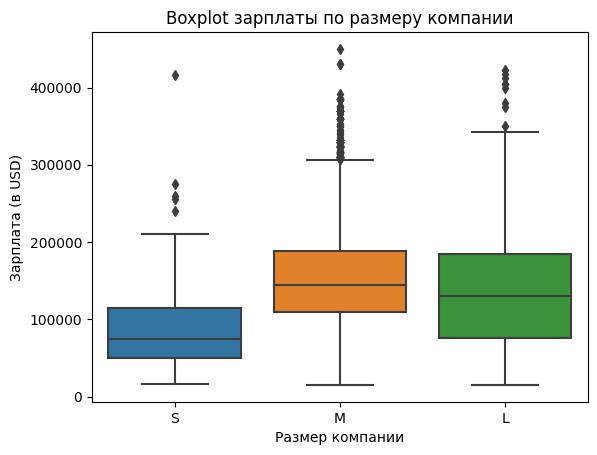

In [12]:
# Создание Boxplot
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])

# Настройки отображения
plt.title('Boxplot зарплаты по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Зарплата (в USD)')


# Ящик с усами
 по оси X размер компаний от S<50 чел M(50-250) L>250, по оси Y заработная плата
 - Видно, что от размера компании зависит разброс заработной платы (длинна усов)
 в компаниях М не только заработная плата не меньше чем в L но и Верхний квартиль немного выше. По этому мы можем предположить что трудоустройство в больших компаниях не всегда приводит к увеличению зп, та же и медианной значение в компания M выше(!) чем в L.
 в во всех компаниях  видим выбросы, но в компаниях S выбросов меньше, возможно ,что для малеьних компаний(проэктов) меньше вилка по зп, но в компаниях M мы видим самое больщое количество выбросов, говорит о том, что высокоуровневые специалисты чаще выбирают не огромные корпорации.

Text(0, 0.5, 'Средний remote_ratio')

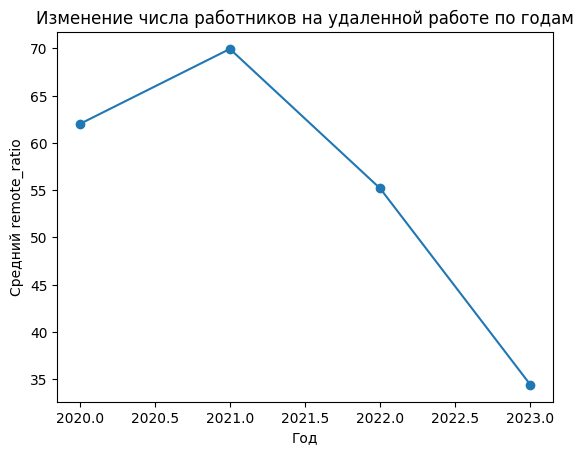

In [25]:
# Группировка данных по годам и вычисление среднего значения remote_ratio
remote_data = df.groupby('work_year')['remote_ratio'].mean()

# Построение линейной диаграммы
remote_data.plot(kind='line', marker='o')
plt.title('Изменение числа работников на удаленной работе по годам')
plt.xlabel('Год')
plt.ylabel('Средний remote_ratio')

## Линейный граффик
 0: Нет удаленной работы (менее 20%)
50: Частично удаленный / гибридный
100: Полностью удаленно (более 80%)
 - на графике видно., что общая тенденция удаленной работы после пика 21го года начала снижаться
 Делаем вывод, что после ковида и локдаунов с удаленной работой, люди начали возращаться в офиссы.

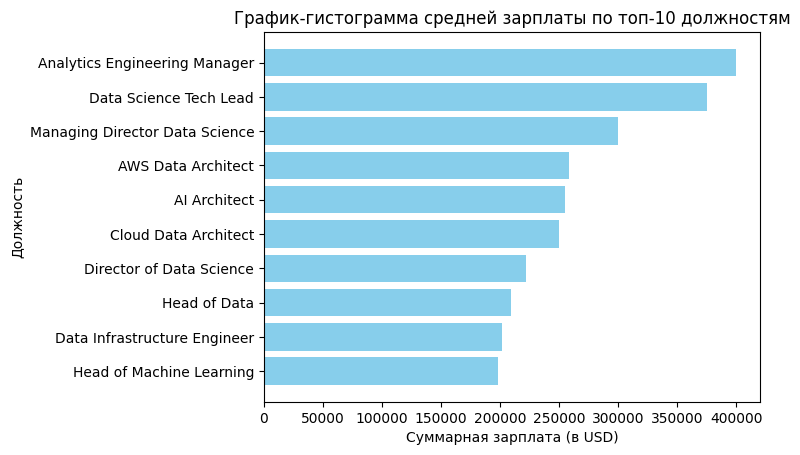

In [28]:
# посчитаем топ 10 вакансий по средней зп
top_10_jobs = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)

# Создание гистограммы
plt.barh(top_10_jobs.index, top_10_jobs.values, color='skyblue')
plt.xlabel('Суммарная зарплата (в USD)')
plt.ylabel('Должность')
plt.title('График-гистограмма средней зарплаты по топ-10 должностям')
plt.gca().invert_yaxis() # Инвертирование оси Y для отображения наиболее высокооплачиваемой должности вверху

## Граффик-гистограмма
  на визуализации видно, что топ 10 зарплат в IT либо связаны с данными либо с Аналитикой.
  Можем предположить, что с количеством увеличения данных и мощностей, эти вакансии будут еще больше востребованей

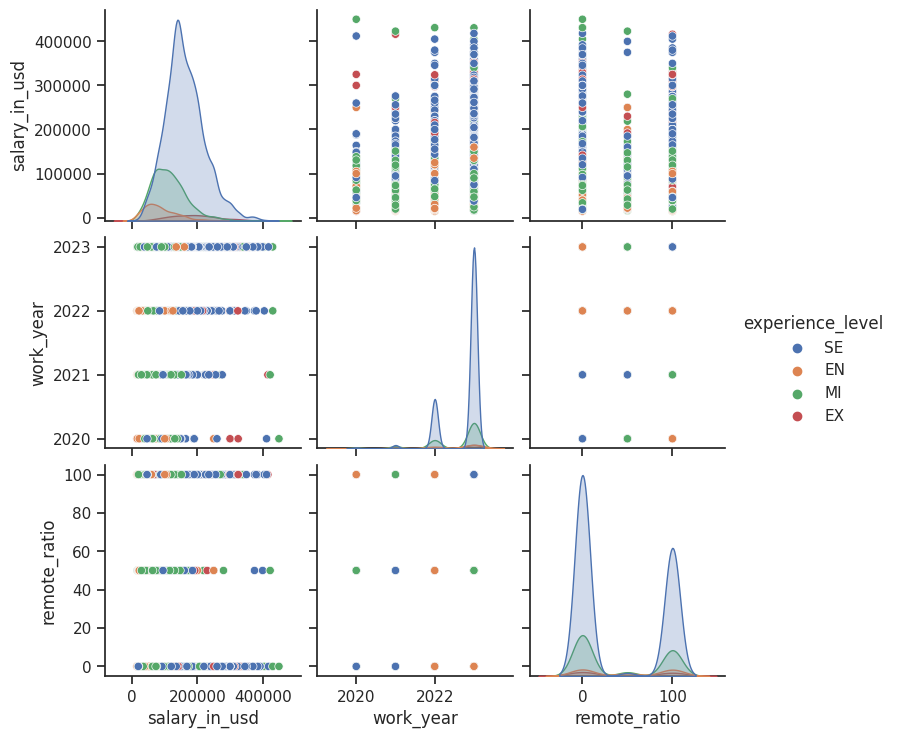

In [34]:
# Выберем подмножество переменных для включения в анализ (int)
variables_to_include = ['salary_in_usd', 'work_year', 'experience_level', 'remote_ratio']

# Создадим матрицу точечных диаграмм
sns.set(style="ticks")
sns.pairplot(df[variables_to_include], hue="experience_level")


## Матрица точечных диаграмм
  Не совсем разобрался с этой визуализацией, работает она только на числах, а в моих данных слабые столбцы числовые, только зп, пробывал разные данные в легенду подставить, выходит не лучше.

Text(116.24999999999999, 0.5, 'Размер компании')

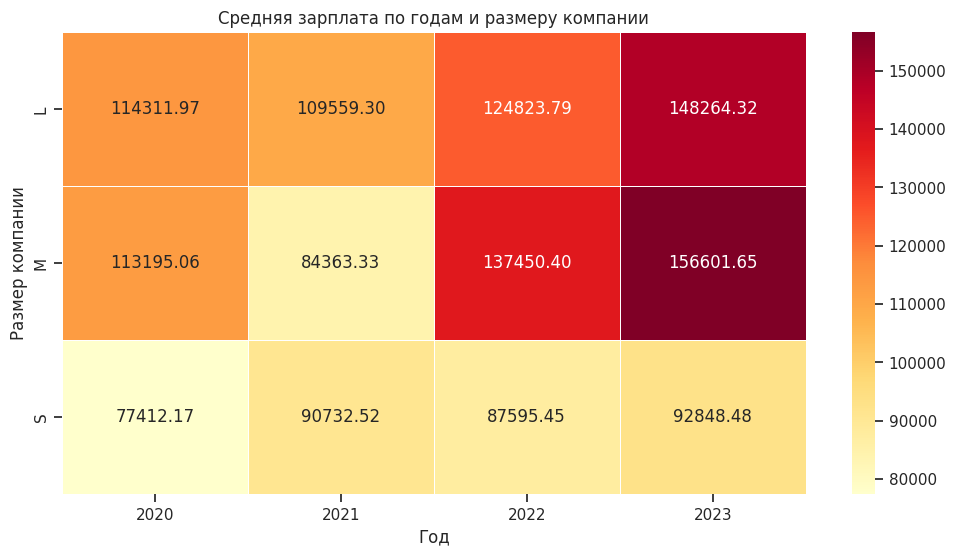

In [38]:
# Группировка данных по годам и уровню опыта и вычисление средней зарплаты для каждой комбинации
salary_by_year_experience = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().reset_index()

# Создание матрицы для тепловой карты
heatmap_data = salary_by_year_experience.pivot(index='company_size', columns='work_year', values='salary_in_usd')

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Средняя зарплата по годам и размеру компании')
plt.xlabel('Год')
plt.ylabel('Размер компании')

## Тепловая карта
 В данной диаграмме видим повышение ЗП в маленьких компаниях в 2021, можем предполодить согласной первой диаграммы, что этот рост зависит от зарплат высоквалифизированых специалистов, ведь в кризис маленьким компания сложнее перекредитоватсья и быть на плаву, наем топ-менеджмента, был для выживания компаний в такое время.
 Заметен сильный рост в средних компаниях и больших после кризиса, что не скажешь о малых компаниях.